In [1]:
import warnings
warnings.filterwarnings('ignore')
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

import os
from datetime import datetime

In [2]:
chloro_path = 'C:/Users/Admin/Downloads/Datasets/NOAA/2022'
sss_path = 'C:/Users/Admin/Downloads/Datasets/SSS/2022'
sst_path = 'C:/Users/Admin/Downloads/Datasets/SST/2022'
ssh_path = 'C:/Users/Admin/Downloads/Datasets/SSH/2022'

files_1 = [f for f in os.listdir(chloro_path) if f.endswith('.nc')]
files_2 = [f for f in os.listdir(sss_path) if f.endswith('.nc')]
files_3 = [f for f in os.listdir(sst_path) if f.endswith('.nc')]
files_4 = [f for f in os.listdir(ssh_path) if f.endswith('.nc')]

In [3]:
ds_chloro = xr.open_mfdataset(os.path.join(chloro_path, f) for f in files_1)
ds_sss = xr.open_mfdataset(os.path.join(sss_path, f) for f in files_2)
ds_sst = xr.open_mfdataset(os.path.join(sst_path, f) for f in files_3)
ds_ssh = xr.open_mfdataset(os.path.join(ssh_path, f) for f in files_4)

In [4]:
from datetime import datetime

# Example datetime objects
start_date = datetime(2022, 1, 1)
end_date = datetime(2022, 12, 31)

# Calculate the number of days between start and end dates
num_days = (end_date - start_date).days

# Calculate the average number of days
avg_days = num_days / 2

print(avg_days)

182.0


In [5]:
# Define function to update plots when date is selected
def update_plots(date):
    #date = change['new']
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    
    # Plot chlorophyll-a concentration
    ds_chloro.sel(time=date, method='nearest').chlor_a.sel(latitude=slice(40, 10), longitude=slice(-98, -60)).plot(ax=axs[0, 0], cmap='jet', vmin=0, vmax=5)
    axs[0, 0].set_title(f'Chlorophyll-a Concentration on {date}')
    axs[0, 0].set_xlabel('')
    axs[0, 0].set_ylabel('')
    
    # Plot sea surface salinity
    ds_sss.sel(time=date, method='nearest').sss_smap_40km.sel(lat=slice(10, 40), lon=slice(262.5, 299.875)).plot(ax=axs[0, 1], cmap='jet', vmin=33, vmax=37)
    axs[0, 1].set_title(f'Sea Surface Salinity on {date}')
    axs[0, 1].set_xlabel('')
    axs[0, 1].set_ylabel('')
    
    # Plot sea surface temperature
    ds_sst.sel(time=date, method='nearest').sea_surface_temperature.sel(lat=slice(10, 40), lon=slice(-100, -60)).plot(ax=axs[1, 0], cmap='jet', vmin=275, vmax=305)
    axs[1, 0].set_title(f'Sea Surface Temperature on {date}')
    axs[1, 0].set_xlabel('Longitude')
    axs[1, 0].set_ylabel('Latitude')
    
    # Plot sea surface height
    ds_ssh.sel(time=date, method='nearest').adt.sel(latitude=slice(10, 40), longitude=slice(-100, -60)).plot(ax=axs[1, 1], cmap='jet', vmin=-1, vmax=1)
    axs[1, 1].set_title(f'Sea Surface Height Anomaly on {date}')
    axs[1, 1].set_xlabel('Longitude')
    axs[1, 1].set_ylabel('Latitude')
    plt.tight_layout()

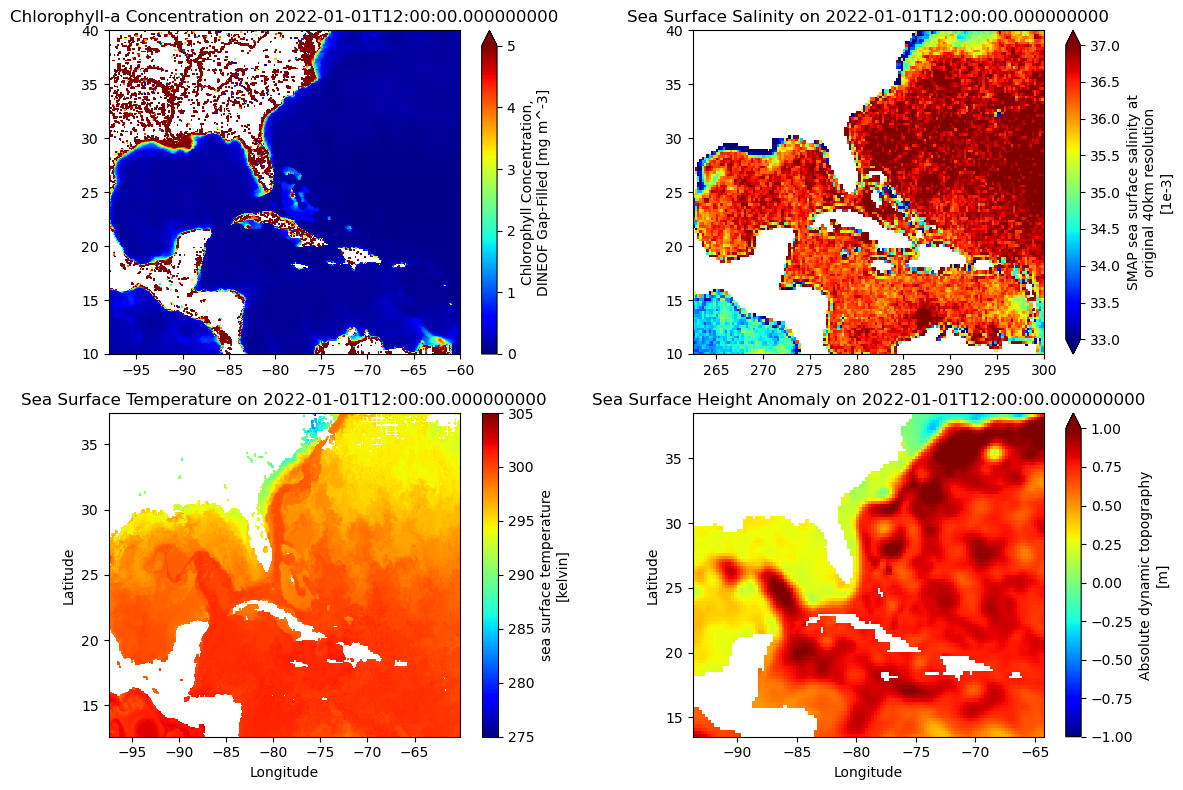

In [6]:
dates = ds_chloro.time.values
update_plots(dates[0])

In [7]:
import ipywidgets as widgets
from ipywidgets import interactive

# Create a list of dates to use for the drop-down widget
date_list = pd.date_range(start='2022-01-01', end='2022-12-31')

# Create the date drop-down widget
date_drop = widgets.Dropdown(options=date_list, description='Select date')

# Use the interactive function to link the date drop-down widget to the update_plots function
interactive_plot = interactive(update_plots, date=date_drop)

# Display the date drop-down widget and the plots
#display(date_drop)
display(interactive_plot)


interactive(children=(Dropdown(description='Select date', options=(Timestamp('2022-01-01 00:00:00', freq='D'),…